In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

In [98]:
df = pd.read_csv("ground_truth_experiment.csv")

# Investivate cases where GTLSA does worse than basic

In [99]:
df.keys()

Index([u'num_workers', u'sample_num', u'objid', u'P [MV]', u'R [MV]',
       u'J [MV]', u'thresh', u'P [GT]', u'R [GT]', u'J [GT]', u'P [isoGT]',
       u'R [isoGT]', u'J [isoGT]', u'P [GTLSA]', u'R [GTLSA]', u'J [GTLSA]',
       u'P [isoGTLSA]', u'R [isoGTLSA]', u'J [isoGTLSA]', u'P [basic]',
       u'R [basic]', u'J [basic]'],
      dtype='object')

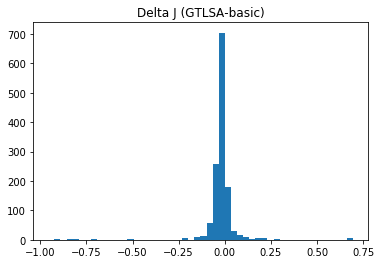

In [100]:
deltaJ = df["J [GTLSA]"]-df["J [basic]"]
plt.hist(deltaJ,bins=50)
plt.title("Delta J (GTLSA-basic)")

In [101]:
# samples where GTLSA performs much worse than basic 
bad_idx = np.where(deltaJ<-0.7)[0]
print bad_idx

[ 39  64  90 100 114 149 189 190 205]


Note that all of these are for the sample 5worker_rand0, also these are all for cases where threshold is 2 and -2 

# Plot independent J values for each threshold separately and for each N_workers separately 

In [102]:
def plot_comparison(x_attr,y1_attr,y2_attr):
    if x_attr=="index":
        a = plt.plot(df.index,df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df.index,df[y2_attr],'x',label=y2_attr )
    else:
        a = plt.plot(df[x_attr],df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df[x_attr],df[y2_attr],'x',label=y2_attr )
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(x_attr)

def compare_PRJ_fixed_attr(attr,y1,y2,plot_metric='PRJ'):
    attr_lst = list(set(df[attr]))
    if 'P' in plot_metric:
        plt.figure()
        plt.title('Precision')
        plot_comparison(attr,"P [{}]".format(y1),"P [{}]".format(y2))
        plt.xticks(attr_lst)
    if 'R' in plot_metric: 
        plt.figure()
        plt.title('Recall')
        plot_comparison(attr,"R [{}]".format(y1),"R [{}]".format(y2))
        plt.xticks(attr_lst)
    if 'J' in plot_metric:
        plt.figure()
        plt.title('Jaccard')
        plot_comparison(attr,"J [{}]".format(y1),"J [{}]".format(y2))
        plt.xticks(attr_lst)
def compare_PRJ_fixed_sample_object(y1,y2):
    plt.figure()
    plot_comparison("index","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("index","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("index","J [{}]".format(y1),"J [{}]".format(y2))

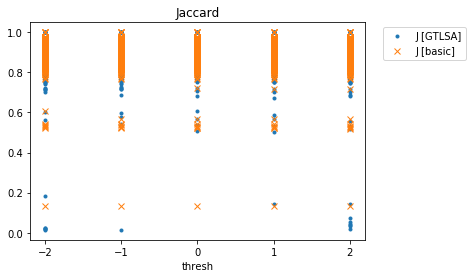

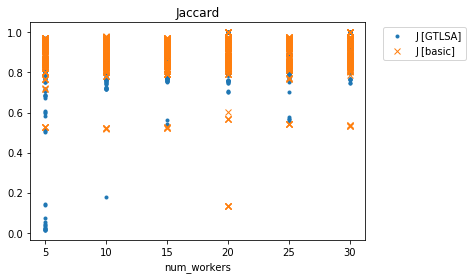

In [103]:
compare_PRJ_fixed_attr("thresh","GTLSA","basic",'J')

compare_PRJ_fixed_attr("num_workers","GTLSA","basic",'J')

It looks like GTLSA performs badly when Nworkers is low and for threshold = -2 and 2

In [104]:
# compare_PRJ_fixed_attr("thresh","isoGTLSA","basic",'J')
# compare_PRJ_fixed_attr("num_workers","isoGTLSA","basic",'J')

# Look at what happens for these bad objects 

In [105]:
df.ix[bad_idx]

,num_workers,sample_num,objid,P [MV],R [MV],J [MV],thresh,P [GT],R [GT],J [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [basic],R [basic],J [basic]
39,5,0,2,0.949744,0.976273,0.928316,2,0.929897,0.986034,0.917808,...,0.112100,0.350592,0.035591,0.033390,0.861538,0.008410,0.008398,0.949744,0.976273,0.928316
64,5,0,10,0.970109,0.969648,0.941518,2,0.961366,0.980971,0.943766,...,0.053203,0.352884,0.042800,0.039686,0.001201,0.020630,0.001136,0.970109,0.969648,0.941518
90,5,0,19,0.953104,0.882929,0.846169,-2,0.934346,0.928819,0.871913,...,0.025888,0.025196,0.961656,0.025171,0.026128,0.998572,0.026127,0.953104,0.882929,0.846169
100,5,0,21,1.000000,0.912607,0.912607,-2,0.987939,0.946258,0.935452,...,0.937921,0.021107,0.993722,0.021104,0.021194,0.997238,0.021192,1.000000,0.912607,0.912607
114,5,0,23,0.945923,0.937791,0.890073,2,0.943552,0.964000,0.911436,...,0.002507,0.691676,0.075403,0.072951,0.970370,0.007821,0.007819,0.945923,0.937791,0.890073
149,5,0,30,0.879012,0.984373,0.866914,2,0.879012,0.984373,0.866914,...,0.857201,0.315229,0.046257,0.042034,0.349713,0.066729,0.059363,0.905344,0.971558,0.881969
189,5,0,39,0.984364,0.988475,0.973194,2,0.984364,0.988475,0.973194,...,0.016684,0.457849,0.016653,0.016331,0.948912,0.021210,0.021186,0.984364,0.988475,0.973194
190,5,0,42,0.955421,0.874118,0.839864,-2,0.919855,0.936216,0.865608,...,0.839864,0.023205,0.971328,0.023189,0.023262,0.973628,0.023247,0.955421,0.874118,0.839864
205,5,0,45,0.959945,0.876376,0.845460,-2,0.932591,0.922709,0.865018,...,0.017450,0.017407,0.987326,0.017403,0.017618,0.999584,0.017617,0.959945,0.876376,0.845460


In [108]:
ls pixel_em/5workers_rand0/obj2/GTLSA*ground_truth*thresh2*

pixel_em/5workers_rand0/obj2/GTLSA_gt_est_ground_truth_mask_thresh2.pkl
pixel_em/5workers_rand0/obj2/GTLSA_p_in_mask_ground_truth_thresh2.pkl
pixel_em/5workers_rand0/obj2/GTLSA_p_not_in_ground_truth_thresh2.pkl
pixel_em/5workers_rand0/obj2/GTLSA_qn1_ground_truth_thresh2.pkl
pixel_em/5workers_rand0/obj2/GTLSA_qn2_ground_truth_thresh2.pkl
pixel_em/5workers_rand0/obj2/GTLSA_qp1_ground_truth_thresh2.pkl
pixel_em/5workers_rand0/obj2/GTLSA_qp2_ground_truth_thresh2.pkl


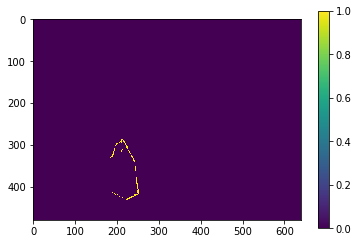

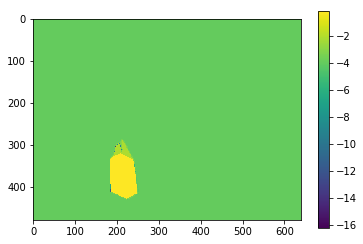

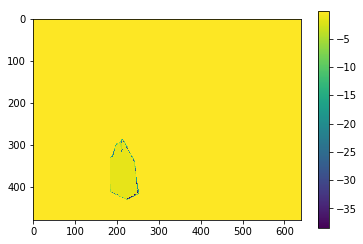

In [127]:
objid=2
thresh=2
gt_est=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_gt_est_ground_truth_mask_thresh{}.pkl'.format(objid,thresh)))
plt.imshow(gt_est)
plt.colorbar()

img=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_p_in_mask_ground_truth_thresh{}.pkl'.format(objid,thresh)))
plt.figure()
plt.imshow(img)
plt.colorbar()

img=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_p_not_in_ground_truth_thresh{}.pkl'.format(objid,thresh)))
plt.figure()
plt.imshow(img)
plt.colorbar()

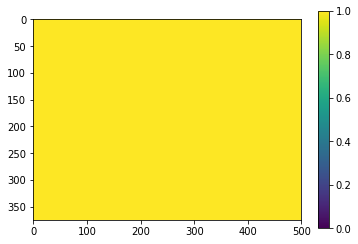

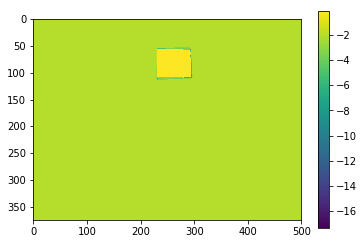

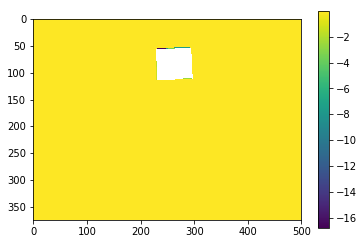

In [128]:
objid=21
thresh=-2
gt_est=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_gt_est_ground_truth_mask_thresh{}.pkl'.format(objid,thresh)))
plt.imshow(gt_est)
plt.colorbar()

img=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_p_in_mask_ground_truth_thresh{}.pkl'.format(objid,thresh)))
plt.figure()
plt.imshow(img)
plt.colorbar()

img=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_p_not_in_ground_truth_thresh{}.pkl'.format(objid,thresh)))
plt.figure()
plt.imshow(img)
plt.colorbar()

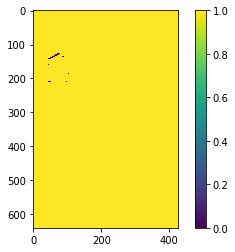

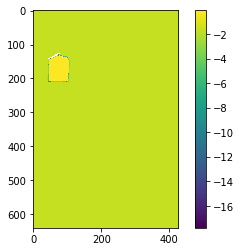

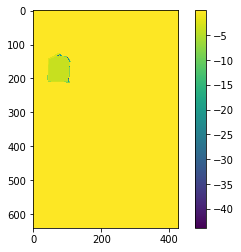

In [130]:
objid=45
thresh=-2
gt_est=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_gt_est_ground_truth_mask_thresh{}.pkl'.format(objid,thresh)))
plt.imshow(gt_est)
plt.colorbar()

img=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_p_in_mask_ground_truth_thresh{}.pkl'.format(objid,thresh)))
plt.figure()
plt.imshow(img)
plt.colorbar()

img=pkl.load(open('pixel_em/5workers_rand0/obj{}/GTLSA_p_not_in_ground_truth_thresh{}.pkl'.format(objid,thresh)))
plt.figure()
plt.imshow(img)
plt.colorbar()

looks like some regions have the -inf problem

included in GT if pinT>thresh+pNotInT

So this just looks like an inappropriate choice of threshold, I wonder what the average PRJ is like if we exclude these  and just look at threshold 0 

In [121]:
df[df["thresh"]==0].filter(regex="J").mean()

J [MV]          0.882326
J [GT]          0.894644
J [isoGT]       0.895458
J [GTLSA]       0.876464
J [isoGTLSA]    0.889516
J [basic]       0.890103
dtype: float64

and maybe with large sample of workers 

In [123]:
df[(df["thresh"]==0)&(df["num_workers"]==30)].filter(regex="J").mean()

J [MV]          0.891173
J [GT]          0.901618
J [isoGT]       0.910802
J [GTLSA]       0.893208
J [isoGTLSA]    0.903682
J [basic]       0.901588
dtype: float64

the numbers are very close but its good that the iso are better than the GT and GTLSA each, and that isoGT seems to be doing the best, and that advanced model>basic > MV, but again this is only over 45 objects

# Does advanced model do when when objects are harder ? 

In [144]:
task_ambiguity = [1,4,35,40,41,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]

#all_hard_tasks = list(set(np.concatenate((task_ambiguity,small_area,high_numPts))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]
selected_objids = [objid  for objid in easy_tasks if objid not in lossless_vtiles]

In [136]:
easy_obj = df[df.objid.isin(easy_tasks)]

In [139]:
easy_obj.filter(regex="J").mean()

J [MV]          0.909812
J [GT]          0.916430
J [isoGT]       0.901502
J [GTLSA]       0.889944
J [isoGTLSA]    0.884045
J [basic]       0.914825
dtype: float64

In [145]:
# hard_obj = df[df.objid.isin(all_hard_tasks)]
all_hard_tasks = list(set(np.concatenate((small_area,high_numPts))))
hard_obj = df[df.objid.isin(all_hard_tasks)]

In [146]:
hard_obj.filter(regex="J").mean()

J [MV]          0.846190
J [GT]          0.847119
J [isoGT]       0.842062
J [GTLSA]       0.824643
J [isoGTLSA]    0.823399
J [basic]       0.851070
dtype: float64

there's no clear distinction showing that advanced model performs better in hard cases

------------------------------------------------------------------------